ref: https://github.com/chaoshangcs/GTS

In [1]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 10.4 MB/s 
     |████████████████████████████████| 180 kB 43.7 MB/s 
     |████████████████████████████████| 97 kB 6.4 MB/s 
     |████████████████████████████████| 139 kB 51.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=c03f2259fe978f8c4a5d306d8606f53bfd03ced3e91ed23ea2e2deab27a7e631
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=d8e47c9bac6870459df127ae1077b551c9ec067d708898b2187a3938016133b4
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/PhD/MLCollective/graphbatt/GTS
!ls

/content/drive/MyDrive/PhD/MLCollective/graphbatt/GTS
'1. gts-graphbatt-train.ipynb'
'2. gts-graphbatt-benchmarking.ipynb'
'4. monteCarlo-gts-gaets-graphbatt-train-evaluate.ipynb'
 data
 gts-debug.ipynb
 lib
 LICENSE
 model
 models
 pytorch-geometric-temporal.ipynb
 README.md
 requirements.txt
 runs
 scripts
 train.py
 wandb


In [4]:
import argparse
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

## read data and convert to h5

1. pick the right dataset for train/test
2. need to adjust dim_fc, num_nodes, seq_len (window size. currently 12, need something more appropriate)

In [4]:
df = pd.read_excel("data/graphbatt/DOE-001-050-10DU_05.xlsx", sheet_name="Channel_81_1")
df

,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Cycle_Index,Voltage(V),Current(A),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),ACR(Ohm),Internal Resistance(Ohm)
0,2018-01-27 15:48:07.913,120.001700,120.0015,1,1,3.415966,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN
1,2018-01-27 15:50:07.912,240.000900,240.0007,1,1,3.416494,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN
2,2018-01-27 15:52:07.912,360.000900,360.0007,1,1,3.416858,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN
3,2018-01-27 15:54:07.912,480.000900,480.0007,1,1,3.417068,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN
4,2018-01-27 15:56:07.913,600.001700,600.0015,1,1,3.417321,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,2018-01-30 15:43:23.754,252014.661532,6720.0002,9,51,4.400059,0.095322,2.172258,0.0,9.404415,0.0,NaN,NaN
2253,2018-01-30 15:45:23.755,252134.662232,6840.0009,9,51,4.400079,0.091357,2.175361,0.0,9.418067,0.0,NaN,NaN
2254,2018-01-30 15:47:23.755,252254.662232,6960.0009,9,51,4.400055,0.086576,2.178333,0.0,9.431144,0.0,NaN,NaN
2255,2018-01-30 15:49:23.754,252374.661532,7080.0002,9,51,4.400024,0.082726,2.181167,0.0,9.443615,0.0,NaN,NaN


In [5]:
# df.set_index("Date_Time", inplace=True)
df[["Voltage(V)", "Current(A)", "Charge_Capacity(Ah)", "Discharge_Capacity(Ah)", "Charge_Energy(Wh)", "Discharge_Energy(Wh)"]].to_hdf("data/graphbatt/DOE-001-050-10DU_05_Channel_81_1.h5", key="df")

(array([ 2., 47.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([38. , 42.6, 47.2, 51.8, 56.4, 61. , 65.6, 70.2, 74.8, 79.4, 84. ]),
 <a list of 10 Patch objects>)

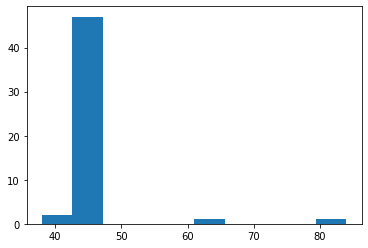

In [6]:
plt.hist(df["Cycle_Index"].value_counts())

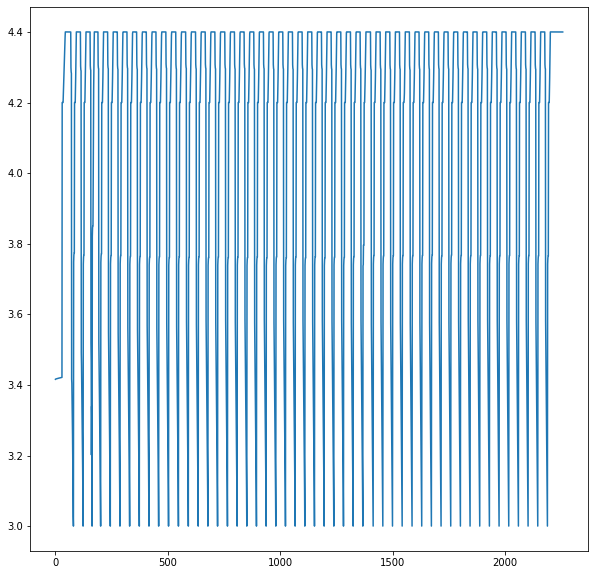

In [7]:
df["Voltage(V)"].plot(figsize=(10, 10))

In [6]:
# graphbatt
!python -m scripts.generate_training_data --output_dir=data/graphbatt/train --traffic_df_filename=data/graphbatt/DOE-001-050-10DU_05_Channel_81_1.h5

Generating training data
x shape:  (1858, 80, 6, 1) , y shape:  (1858, 320, 6, 1)
train x:  (1301, 80, 6, 1) y: (1301, 320, 6, 1)
val x:  (185, 80, 6, 1) y: (185, 320, 6, 1)
test x:  (372, 80, 6, 1) y: (372, 320, 6, 1)


## train dataset

1. key is to update data/model/para_graphbatt.yaml
2. need to see how normalisation was done

In [7]:
# Use graphbatt dataset
!python train.py --config_filename=data/model/para_graphbatt.yaml --temperature=0.5 --model_name="GTS"

2021-09-22 13:46:09,108 - INFO - Log directory: data/model/GTS_DR_2_h_320_64_lr_0.005_bs_64_0922134609/
2021-09-22 13:46:09,569 - INFO - Model created
wandb: Currently logged in as: eekosasih (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.12.2
wandb: Syncing run GTS_2021-09-22T13:46:08.729188
wandb: ⭐️ View project at https://wandb.ai/eekosasih/GraphBatt
wandb: 🚀 View run at https://wandb.ai/eekosasih/GraphBatt/runs/2ipmc39c
wandb: Run data is saved locally in /content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/wandb/run-20210922_134610-2ipmc39c
wandb: Run `wandb offline` to turn off syncing.

2021-09-22 13:46:13,306 - INFO - Start training ...
2021-09-22 13:46:13,306 - INFO - num_batches:21
Num of epoch: 0
2021-09-22 13:46:14,685 - INFO - Total trainable parameters 2596563
2021-09-22 13:47:00,808 - INFO - epoch complete
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()`

## visualise trained model result

In [15]:
class DummyTrainArgs():
  def __init__(self, config_filename, use_cpu_only, temperature):
    self.config_filename = config_filename
    self.use_cpu_only = use_cpu_only
    self.temperature = temperature

args = DummyTrainArgs(config_filename="data/model/para_graphbatt.yaml", use_cpu_only=False, temperature=0.5)

import argparse
import yaml
from importlib import reload
import model
reload(model)
from model.pytorch.supervisor import GTSSupervisor
from lib.utils import load_graph_data

with open(args.config_filename) as f:
    supervisor_config = yaml.load(f)
    save_adj_name = args.config_filename[11:-5]
    supervisor = GTSSupervisor(save_adj_name, temperature=args.temperature, **supervisor_config)
    supervisor.train()

# NEED TO PRESS STOP IMMEDIATELY

2021-09-22 08:54:02,723 - INFO - Log directory: data/model/GTS_DR_2_h_320_64_lr_0.005_bs_64_0922085402/
2021-09-22 08:54:02,723 - INFO - Log directory: data/model/GTS_DR_2_h_320_64_lr_0.005_bs_64_0922085402/
2021-09-22 08:54:03,000 - INFO - Model created
2021-09-22 08:54:03,000 - INFO - Model created


2021-09-22 08:54:14,274 - INFO - Start training ...
2021-09-22 08:54:14,274 - INFO - Start training ...
2021-09-22 08:54:14,281 - INFO - num_batches:21
2021-09-22 08:54:14,281 - INFO - num_batches:21
Num of epoch: 0
2021-09-22 08:54:15,768 - INFO - Total trainable parameters 2596563
2021-09-22 08:54:15,768 - INFO - Total trainable parameters 2596563


KeyboardInterrupt: ignored

In [16]:
# load memory from the last epoch
# supervisor._epoch_num = 6 # original model
supervisor._epoch_num = 0 # with trace
supervisor.load_model()

2021-09-22 08:54:21,866 - INFO - Loaded model at 0
2021-09-22 08:54:21,866 - INFO - Loaded model at 0


In [19]:
"""
Load Data Batch by Batch
"""

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

label = "with_regularization"
temp = supervisor.temperature
gumbel_soft = True
batches_seen = 0

test_iterator = supervisor._data["test_loader"].get_iterator()
for batch_idx, (x, y) in enumerate(test_iterator):
  x, y = supervisor._prepare_data(x, y)
  output, mid_output = supervisor.GTS_model(label, x, supervisor._train_feas, temp, gumbel_soft, y, batches_seen)

  # time series loss
  loss_1 = supervisor._compute_loss(y, output)

  # adjacency matrix loss
  pred = mid_output.view(mid_output.shape[0] * mid_output.shape[1])
  true_label = supervisor.adj_mx.view(mid_output.shape[0] * mid_output.shape[1]).to(device)
  compute_loss = torch.nn.BCELoss()
  loss_g = compute_loss(pred, true_label)

  # """ MODIFICATION """                    
  # # acyclicity constraint
  # loss_acyclic = torch.trace(torch.matrix_exp(mid_output * mid_output))
  # # autoencoder reconstruction error
  # loss_autoencoder = supervisor._compute_loss(supervisor._train_feas, _train_feas_rec)
  # # total loss
  # loss = loss_1 + loss_acyclic + loss_autoencoder

  """ ORIGINAL """
  loss = loss_1 + loss_g
  # option
  # loss = loss_1 + 10*loss_g
  # losses.append((loss_1.item()+loss_g.item()))

  print(batch_idx, loss, loss_1, loss_g, loss_acyclic)

  break

2021-09-22 08:54:45,973 - INFO - Total trainable parameters 2596563
2021-09-22 08:54:45,973 - INFO - Total trainable parameters 2596563
0 tensor(1.3690, grad_fn=<AddBackward0>) tensor(0.8855, grad_fn=<MeanBackward0>) tensor(0.4834, grad_fn=<BinaryCrossEntropyBackward>) tensor(9.7639, grad_fn=<TraceBackward>)


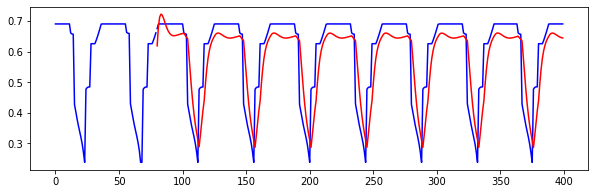

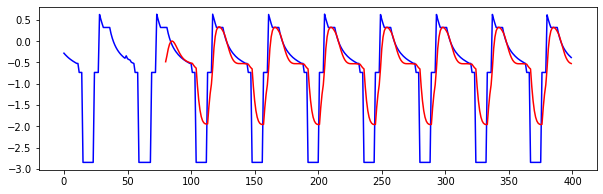

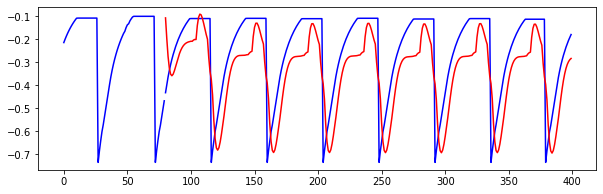

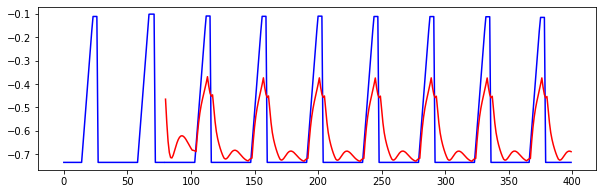

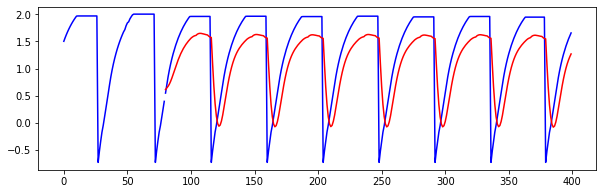

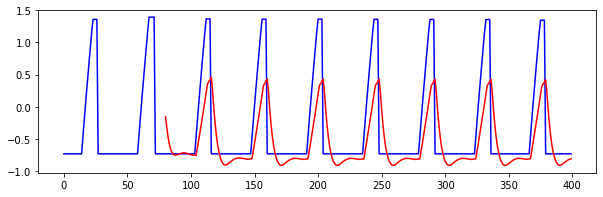

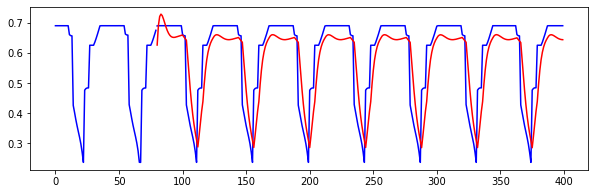

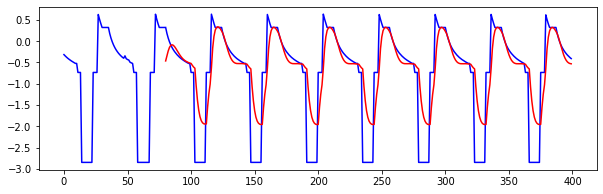

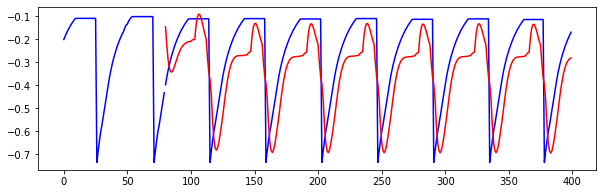

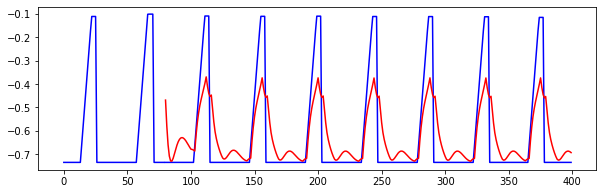

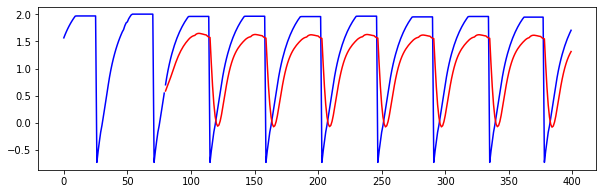

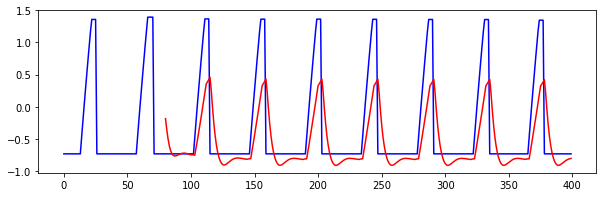

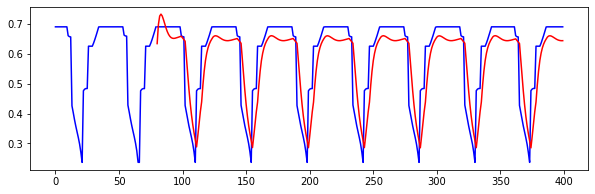

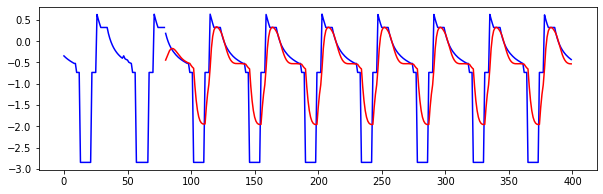

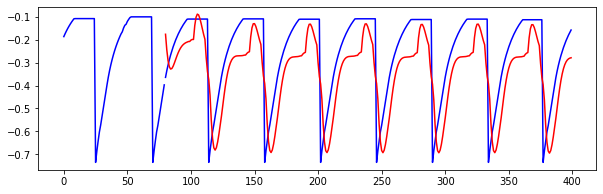

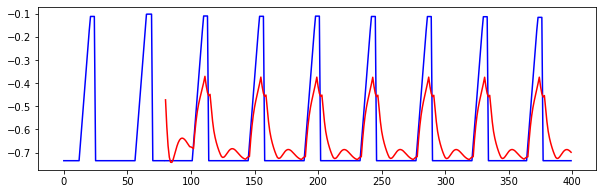

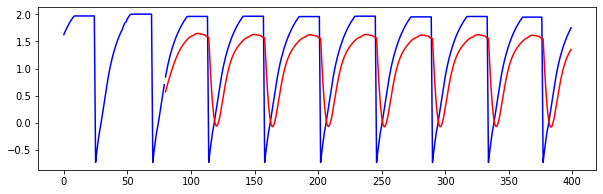

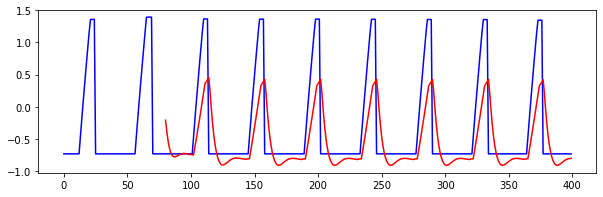

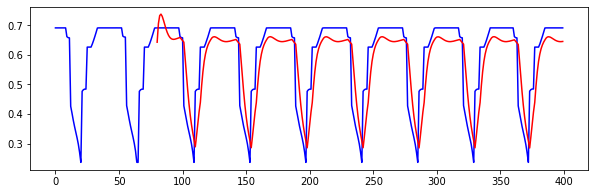

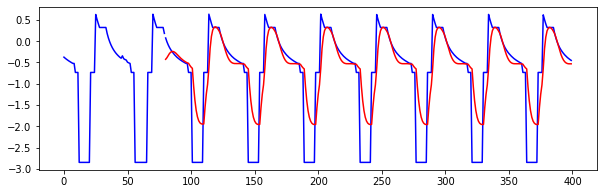

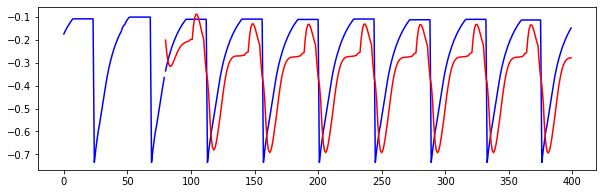

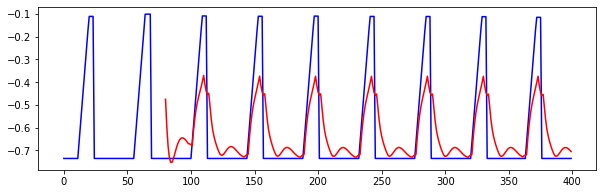

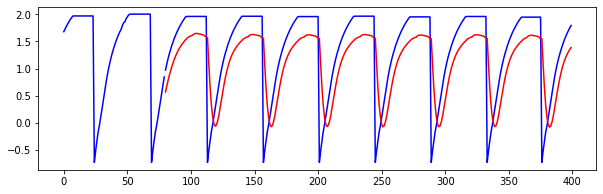

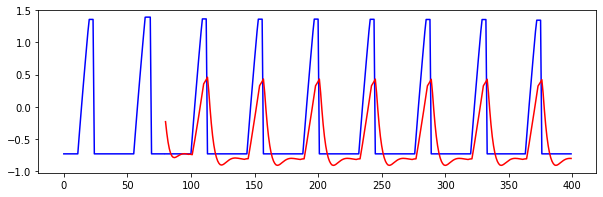

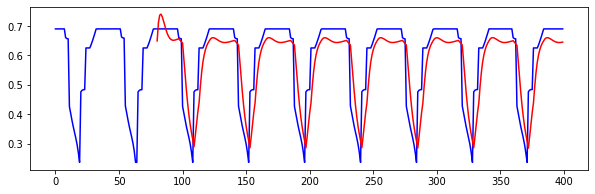

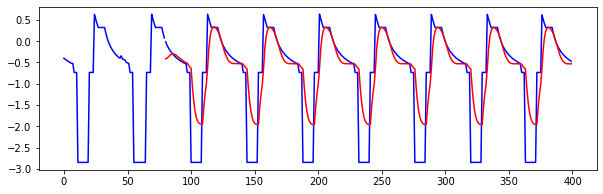

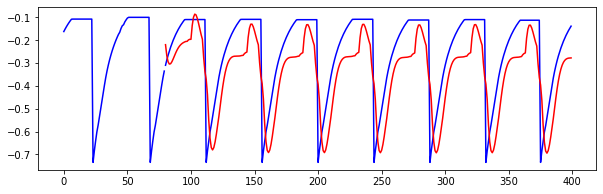

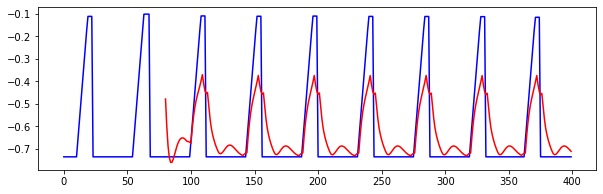

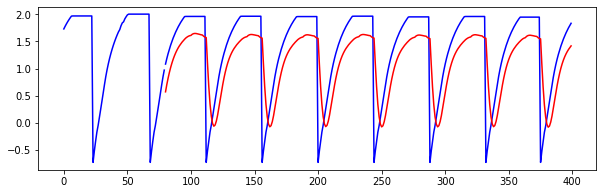

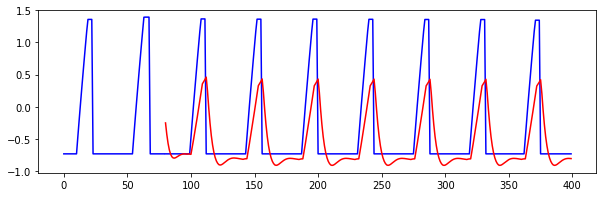

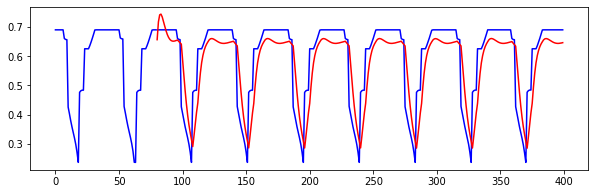

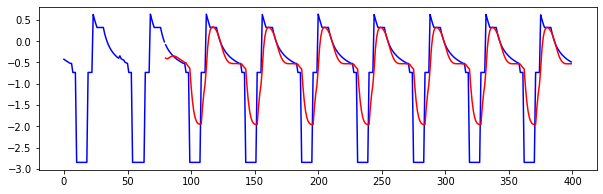

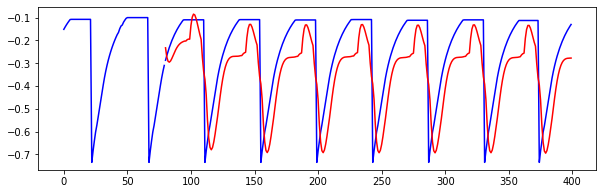

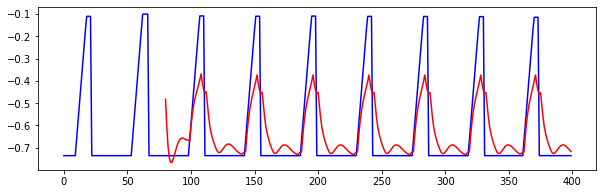

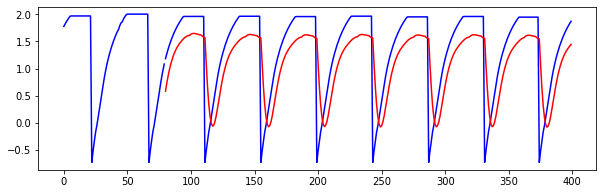

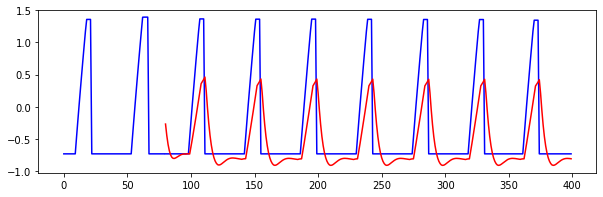

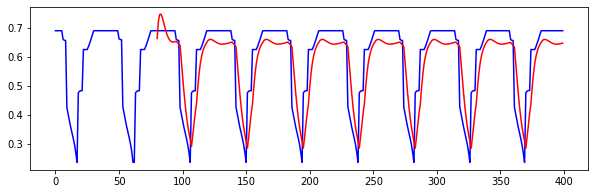

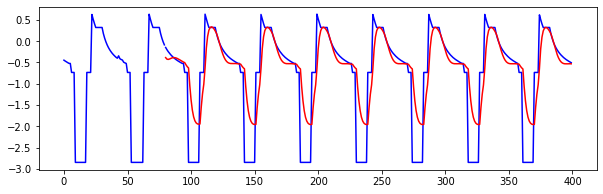

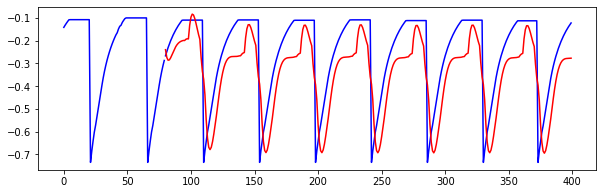

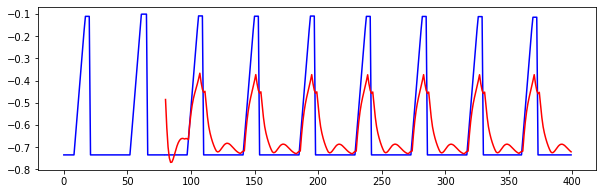

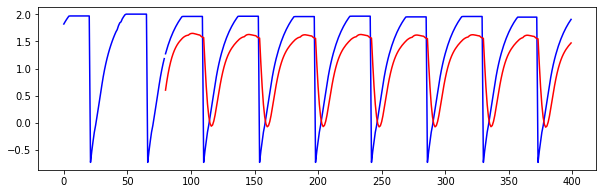

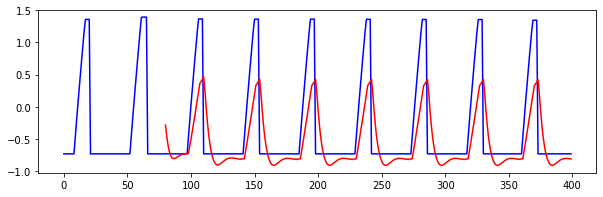

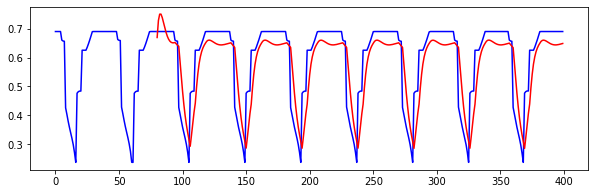

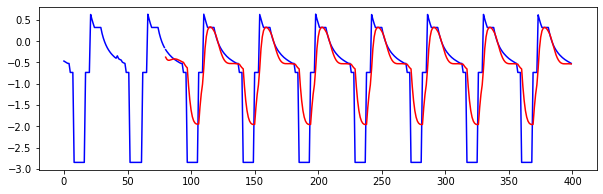

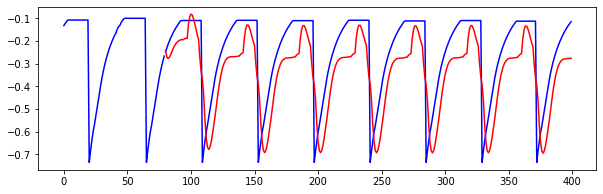

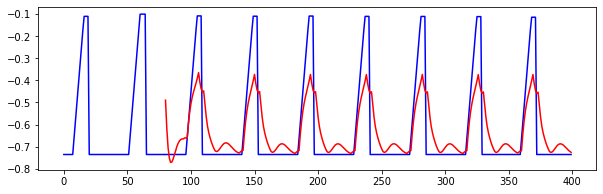

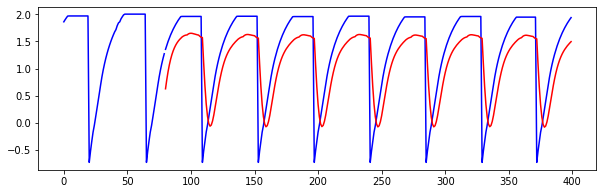

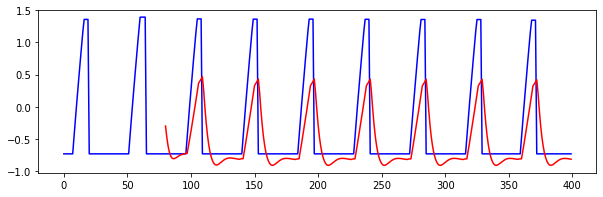

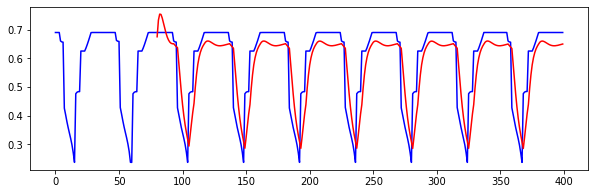

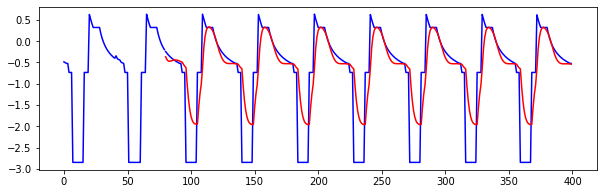

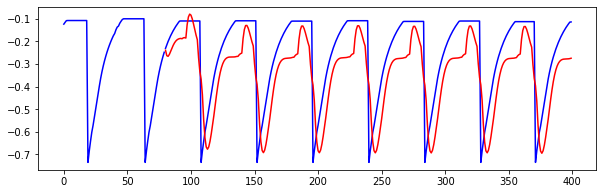

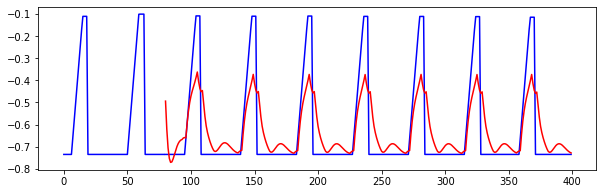

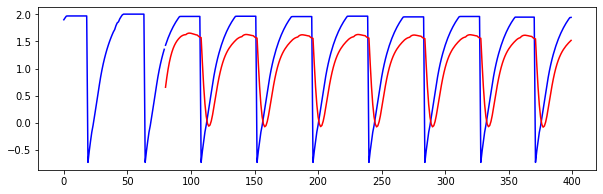

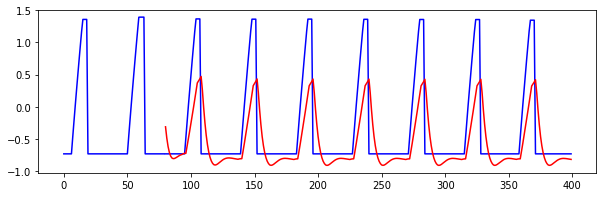

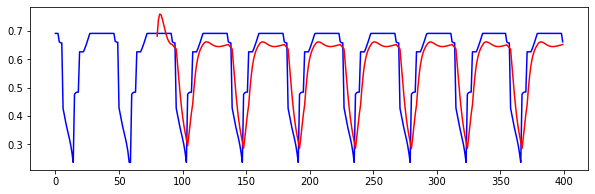

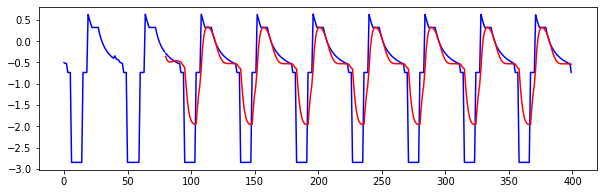

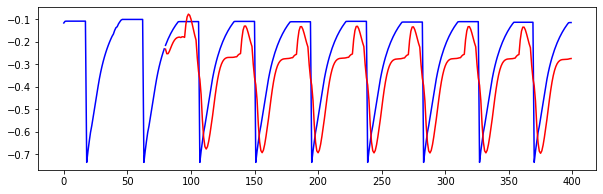

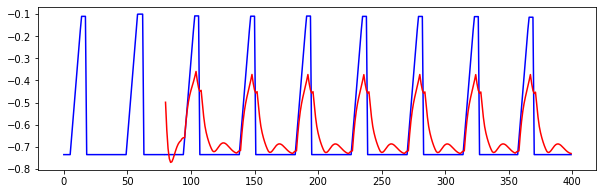

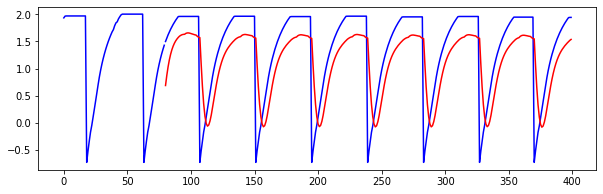

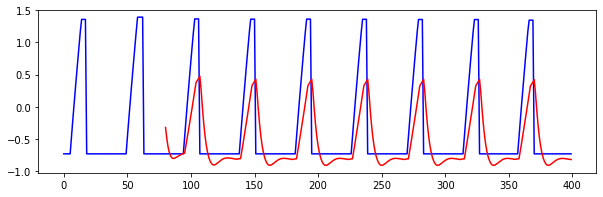

In [20]:
for batch_id in range(10):
  for signal_id in range(output.shape[2]):
    plt.figure(figsize=(10, 3))
    _x = x[:,batch_id,signal_id]
    plt.plot(range(0, _x.shape[0]), _x, c="b")
    _y_true = y[:,batch_id,signal_id]
    plt.plot(range(_x.shape[0], _x.shape[0]+_y_true.shape[0]), _y_true, c="b")
    _y_pred = output[:,batch_id,signal_id].detach().cpu().numpy()
    plt.plot(range(_x.shape[0], _x.shape[0]+_y_pred.shape[0]), _y_pred, c="r")
    plt.show()


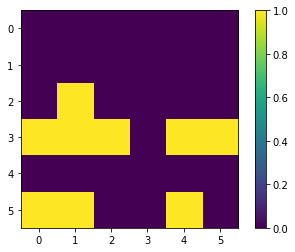

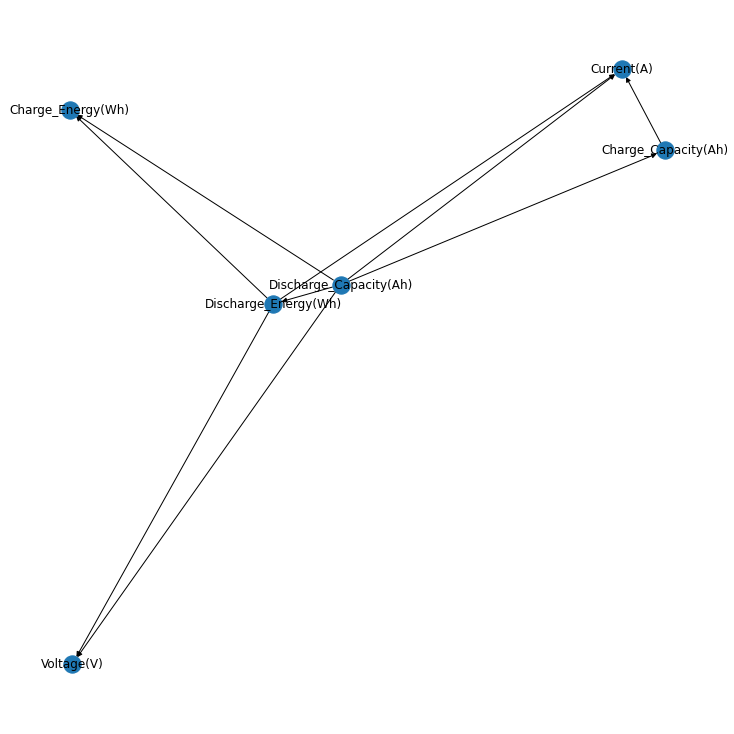

In [ ]:
"""
Visualise Adjacency Matrix
"""

adj = mid_output.detach().cpu().numpy()
# put threshold of value
adj = adj > 0.8
plt.imshow(adj)
plt.colorbar()

"""
Plot in Networkx
"""
import networkx as nx

G = nx.from_numpy_matrix(adj, create_using=nx.DiGraph)
labels = {
    0: "Voltage(V)", 
    1: "Current(A)", 
    2: "Charge_Capacity(Ah)", 
    3: "Discharge_Capacity(Ah)", 
    4: "Charge_Energy(Wh)", 
    5: "Discharge_Energy(Wh)"
}
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels = True, labels=labels)

not sure how to interpret the graph - doesn't seem to correlate with the underlying causality model. Maybe because the underlying adjacency matrix was defined using k-neighborhood similarity

also remember because we use 2 nearest neighbors, each node can only have 2 outgoing edges

To Do

1. Not sure if this is the right adjacency matrix to use

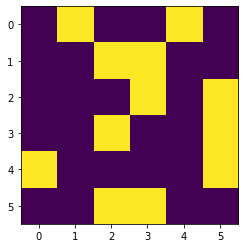

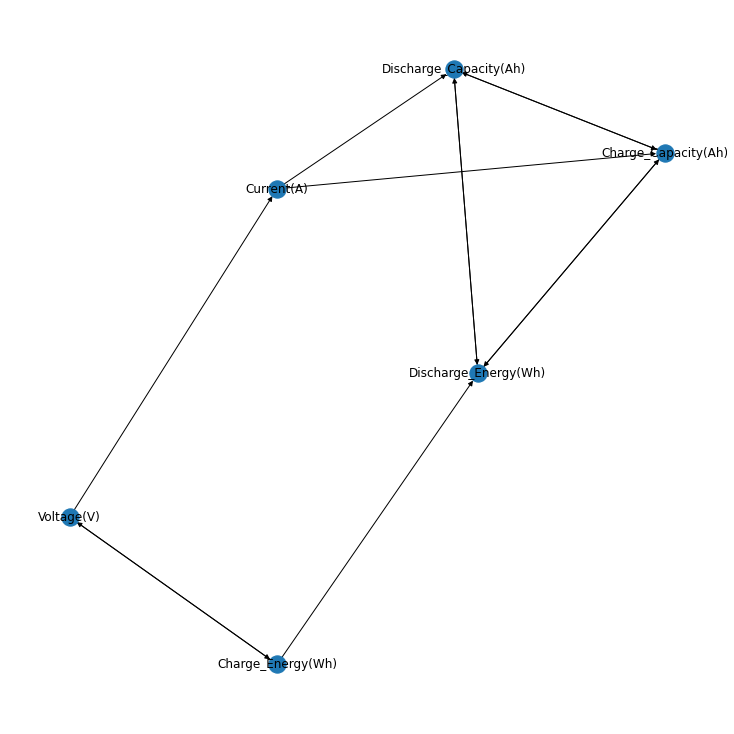

In [ ]:
adj_mx = supervisor.adj_mx.cpu().numpy()

plt.imshow(adj_mx)

G = nx.from_numpy_matrix(adj_mx, create_using=nx.DiGraph)
labels = {
    0: "Voltage(V)", 
    1: "Current(A)", 
    2: "Charge_Capacity(Ah)", 
    3: "Discharge_Capacity(Ah)", 
    4: "Charge_Energy(Wh)", 
    5: "Discharge_Energy(Wh)"
}
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels = True, labels=labels)

## train VAR

seems wrong

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR
from lib.utils import StandardScaler
from tqdm.notebook import tqdm

In [ ]:
input = df[["Voltage(V)", "Current(A)", "Charge_Capacity(Ah)", "Discharge_Capacity(Ah)", "Charge_Energy(Wh)", "Discharge_Energy(Wh)"]]

  0%|          | 0/320 [00:00<?, ?it/s]

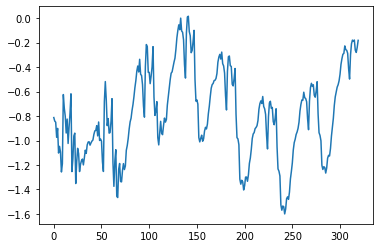

In [ ]:
scaler = StandardScaler(mean=input.values.mean(), std=input.values.std())
data = scaler.transform(input.values)
var_model = VAR(data)
var_result = var_model.fit(80)

var_predictions = [] 
for i in tqdm(range(320)):
  var_prediction = var_result.forecast(data[-80:, :], 1)
  data = np.concatenate([data, var_prediction])
  var_predictions.extend(var_prediction)


# plt.plot(data[:, 1])
var_predictions = np.array(var_predictions)
plt.plot(var_predictions[:, 1])

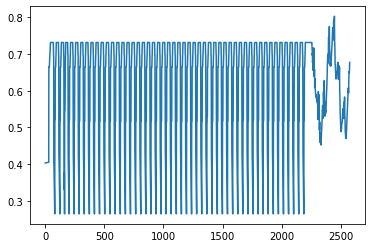

In [ ]:
plt.plot(data[:, 0])

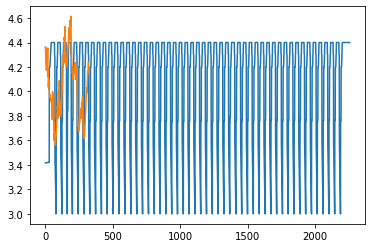

In [ ]:
# fit VAR model on input
var_model = VAR(input)
# TODO: choose best lag
var_result = var_model.fit(80)
var_prediction = var_result.forecast(input.values, 320)
plt.plot(df["Voltage(V)"])
plt.plot(var_prediction[:, 0])

## Train LSTM

In [ ]:
""" LOAD TRAIN DATA """
class DummyTrainArgs():
  def __init__(self, config_filename, use_cpu_only, temperature):
    self.config_filename = config_filename
    self.use_cpu_only = use_cpu_only
    self.temperature = temperature

args = DummyTrainArgs(config_filename="data/model/para_graphbatt.yaml", use_cpu_only=False, temperature=0.5)

import argparse
import yaml
from importlib import reload
import model
reload(model)
from model.pytorch.supervisor import GTSSupervisor
from lib.utils import load_graph_data

with open(args.config_filename) as f:
    supervisor_config = yaml.load(f)
    save_adj_name = args.config_filename[11:-5]
    supervisor = GTSSupervisor(save_adj_name, temperature=args.temperature, **supervisor_config)

    # some layers are only activated when .train() is called
    supervisor.train()

# NEED TO PRESS STOP IMMEDIATELY

2021-09-20 13:15:43,039 - INFO - Log directory: data/model/GTS_DR_2_h_320_64_lr_0.005_bs_64_0920131542/
2021-09-20 13:15:46,852 - INFO - Model created
2021-09-20 13:15:46,854 - INFO - Start training ...
2021-09-20 13:15:46,855 - INFO - num_batches:6
Num of epoch: 0
2021-09-20 13:15:48,773 - INFO - Total trainable parameters 2596563


KeyboardInterrupt: ignored

In [ ]:
"""
Load Data Batch by Batch
"""
# load memory from the last epoch
# GTS/models/*.tar
supervisor._epoch_num = 6
supervisor.load_model()
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

label = "with_regularization"
temp = supervisor.temperature
gumbel_soft = True
batches_seen = 0

train_iterator = supervisor._data["train_loader"].get_iterator()

2021-09-20 13:16:02,571 - INFO - Loaded model at 6


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
for batch_idx, (x, y) in tqdm(enumerate(train_iterator)):
  x, y = supervisor._prepare_data(x, y)

  break

0it [00:00, ?it/s]

In [ ]:
x.shape, y.shape

(torch.Size([80, 64, 6]), torch.Size([320, 64, 6]))

In [ ]:
from torch.nn import LSTM

In [ ]:
# (input_size, hidden_size, number_of_layers)

rnn = LSTM(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
c0 = torch.randn(2, 3, 20)
output, (hn, cn) = rnn(input, (h0, c0))

input.shape, output.shape

(torch.Size([5, 3, 10]), torch.Size([5, 3, 20]))

In [ ]:
# (input_size, hidden_size, number_of_layers)

rnn = LSTM(6, 6, 80, batch_first=False)
# sequence_length, batch_size, feat
input = torch.randn(80, 64, 6)
h0 = torch.randn(80, 64, 6)
c0 = torch.randn(80, 64, 6)
output, (hn, cn) = rnn(input, (h0, c0))

input.shape, output.shape

(torch.Size([80, 64, 6]), torch.Size([80, 64, 6]))

## Load and Test Model on A New Dataset

1. on test dataset (all files)
2. on a new excel sheet -> seems like the result is not bad. But need to generate signal for longer period before seeing result


In [5]:
import torch

from tqdm.notebook import tqdm
import networkx as nx

In [17]:
# create test dataset

df = pd.read_excel("data/graphbatt/DOE-001-050-10DU_05.xlsx", sheet_name="Channel_82_1")
# keep dimension  the same with train dataset
df = df.iloc[:2257]
df.set_index("Date_Time", inplace=True)
df[["Voltage(V)", "Current(A)", "Charge_Capacity(Ah)", "Discharge_Capacity(Ah)", "Charge_Energy(Wh)", "Discharge_Energy(Wh)"]].to_hdf("data/graphbatt/DOE-001-050-10DU_05_Channel_82_1.h5", key="df")

!python -m scripts.generate_training_data --output_dir=data/graphbatt --traffic_df_filename=data/graphbatt/DOE-001-050-10DU_05_Channel_82_1.h5

Generating training data
x shape:  (1858, 80, 6, 1) , y shape:  (1858, 320, 6, 1)
train x:  (1301, 80, 6, 1) y: (1301, 320, 6, 1)
val x:  (185, 80, 6, 1) y: (185, 320, 6, 1)
test x:  (372, 80, 6, 1) y: (372, 320, 6, 1)


In [6]:
class DummyTrainArgs():
  def __init__(self, config_filename, use_cpu_only, temperature):
    self.config_filename = config_filename
    self.use_cpu_only = use_cpu_only
    self.temperature = temperature

args = DummyTrainArgs(config_filename="data/model/para_graphbatt_test.yaml", use_cpu_only=False, temperature=0.5)

import argparse
import yaml
from importlib import reload
import model
reload(model)
from model.pytorch.supervisor import GTSSupervisor
from lib.utils import load_graph_data

with open(args.config_filename) as f:
    supervisor_config = yaml.load(f)
    save_adj_name = args.config_filename[11:-5]
    supervisor = GTSSupervisor(save_adj_name, temperature=args.temperature, **supervisor_config)

    # some layers are only activated when .train() is called
    supervisor.train()

# NEED TO PRESS STOP IMMEDIATELY

2021-09-22 08:51:20,599 - INFO - Log directory: data/model/GTS_DR_2_h_320_64_lr_0.005_bs_64_0922085120/
2021-09-22 08:51:21,286 - INFO - Model created


wandb: Currently logged in as: eekosasih (use `wandb login --relogin` to force relogin)


2021-09-22 08:51:35,423 - INFO - Start training ...
2021-09-22 08:51:35,433 - INFO - num_batches:21
Num of epoch: 0
2021-09-22 08:51:38,094 - INFO - Total trainable parameters 2596563


KeyboardInterrupt: ignored

In [8]:
"""
Load Data Batch by Batch
"""
# load memory from the last epoch
# supervisor._epoch_num = 6
supervisor._epoch_num = 0
supervisor.load_model()
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

label = "with_regularization"
temp = supervisor.temperature
gumbel_soft = True
batches_seen = 0

test_iterator = supervisor._data["test_loader"].get_iterator()

2021-09-22 08:51:45,096 - INFO - Loaded model at 0


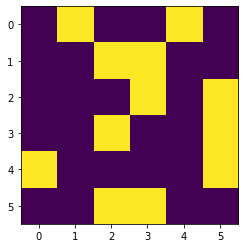

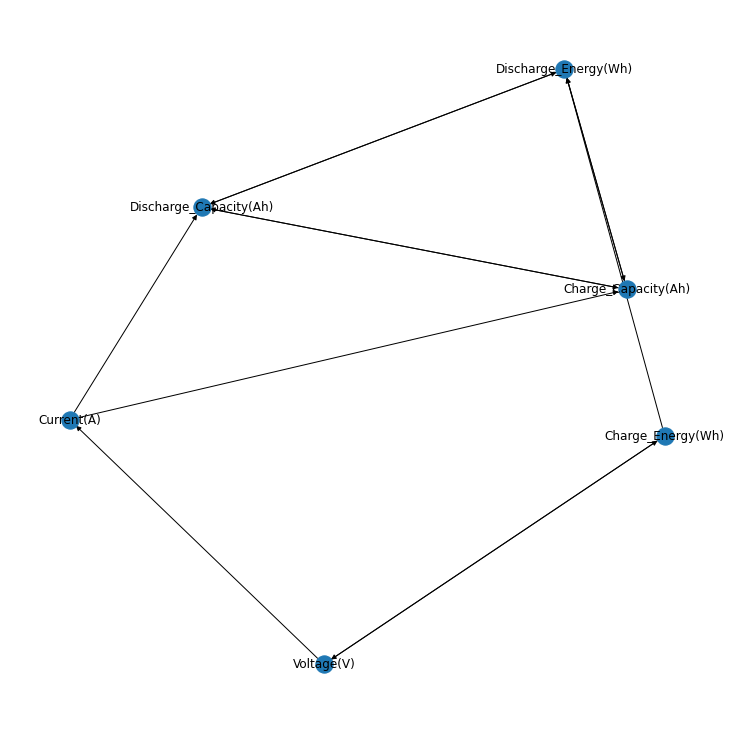

In [9]:
"""
PLOT LEARNED ADJACENCY MATRIX
"""

adj_mx = supervisor.adj_mx.cpu().numpy()

plt.imshow(adj_mx)

G = nx.from_numpy_matrix(adj_mx, create_using=nx.DiGraph)
labels = {
    0: "Voltage(V)", 
    1: "Current(A)", 
    2: "Charge_Capacity(Ah)", 
    3: "Discharge_Capacity(Ah)", 
    4: "Charge_Energy(Wh)", 
    5: "Discharge_Energy(Wh)"
}
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels = True, labels=labels)

## Compare Performance

scripts/eval_baseline_methods.py

In [10]:
import scripts.eval_baseline_methods

import argparse
import numpy as np
import pandas as pd

from statsmodels.tsa.vector_ar.var_model import VAR

# from lib import utils
from lib.metrics import masked_rmse_np, masked_mape_np, masked_mae_np
from lib.utils import StandardScaler

# from scripts.eval_baseline_methods import *

from tqdm.notebook import tqdm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


All


In [12]:
"""
COMPARE PERFORMANCE
"""

test_iterator = supervisor._data["test_loader"].get_iterator()

# for each batch
var_rmses = []
var_mapes = []
var_maes = []
gts_rmses = []
gts_mapes = []
gts_maes = []

# for each batch
for batch_idx, (x, y) in tqdm(enumerate(test_iterator)):
  x, y = supervisor._prepare_data(x, y)

  # GTS predictiom
  output, mid_output = supervisor.GTS_model(label, x, supervisor._train_feas, temp, gumbel_soft, y, batches_seen)
  output = output.detach()

  # for each batch
  for i in range(x.shape[1]):
    labels = y[:, i, :].numpy()

    """
    VAR
    """
    input = x[:, i, :].numpy()

    # fit VAR model on input
    var_model = VAR(input)
    # TODO: choose best lag
    var_result = var_model.fit(31)
    var_prediction = var_result.forecast(input, 320)

    var_rmse = masked_rmse_np(preds=var_prediction, labels=labels, null_val=0)
    var_mape = masked_mape_np(preds=var_prediction, labels=labels, null_val=0)
    var_mae = masked_mae_np(preds=var_prediction, labels=labels, null_val=0)

    # keep track
    if abs(var_rmse) < np.float("inf"):
      var_rmses.append(var_rmse)
    if abs(var_mape) < np.float("inf"):
      var_mapes.append(var_mape)
    if abs(var_mae) < np.float("inf"):
      var_maes.append(var_mae)


    """
    GTS
    """
    gts_prediction = output[:, i, :].numpy()
    gts_rmse = masked_rmse_np(preds=gts_prediction, labels=labels, null_val=0)
    gts_mape = masked_mape_np(preds=gts_prediction, labels=labels, null_val=0)
    gts_mae = masked_mae_np(preds=gts_prediction, labels=labels, null_val=0)

    # keep track
    if abs(gts_rmse) < np.float("inf"):
      gts_rmses.append(gts_rmse)
    if abs(gts_mape) < np.float("inf"):
      gts_mapes.append(gts_mape)
    if abs(gts_mae) < np.float("inf"):
      gts_maes.append(gts_mae)


0it [00:00, ?it/s]

2021-09-22 08:52:08,779 - INFO - Total trainable parameters 2596563


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:96: RuntimeWarning: overflow encountered in true_divide
  mape = np.abs(np.divide(np.subtract(preds, labels).astype('float32'), labels))


2021-09-22 08:52:14,669 - INFO - Total trainable parameters 2596563
2021-09-22 08:52:20,947 - INFO - Total trainable parameters 2596563
2021-09-22 08:52:26,753 - INFO - Total trainable parameters 2596563
2021-09-22 08:52:32,876 - INFO - Total trainable parameters 2596563
2021-09-22 08:52:38,704 - INFO - Total trainable parameters 2596563


GTS 0.4505083 0.7141038 0.281264
VAR 0.46067303 0.49983206 0.17382704


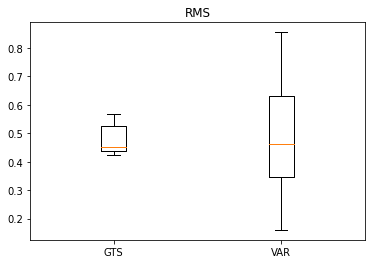

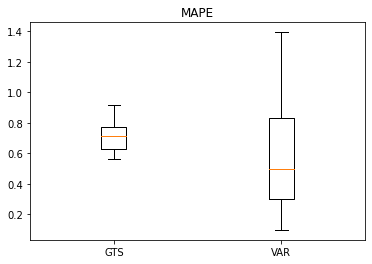

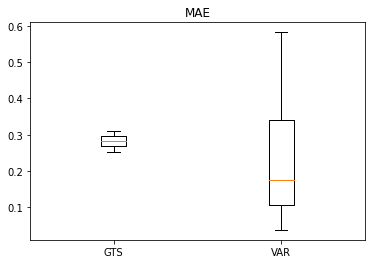

In [13]:
"""
TEST RESULTS
"""

print("GTS", np.median(gts_rmses), np.median(gts_mapes), np.median(gts_maes))
print("VAR", np.median(var_rmses), np.median(var_mapes), np.median(var_maes))

scores = [
    ("RMS", ["GTS", "VAR"], [gts_rmses, var_rmses]),
    ("MAPE", ["GTS", "VAR"], [gts_mapes, var_mapes]),
    ("MAE", ["GTS", "VAR"], [gts_maes, var_maes]),
]

for score_name, score_ticks, score_values in scores:
  plt.title(score_name)
  for i, score_value in enumerate(score_values):
    plt.boxplot(score_value, positions=[i], showfliers=False)
  plt.xticks(range(len(score_ticks)), score_ticks)
  plt.plot()
  plt.show()


0


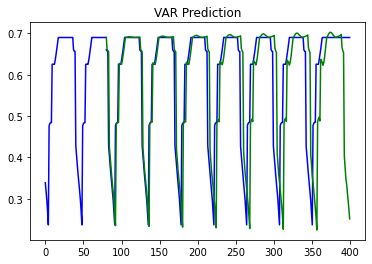

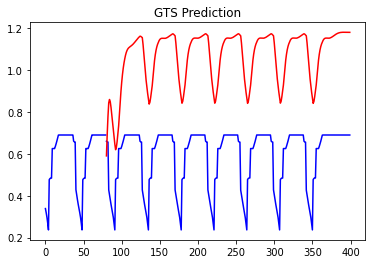

1


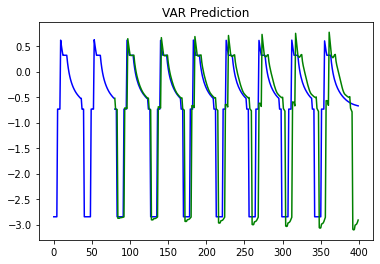

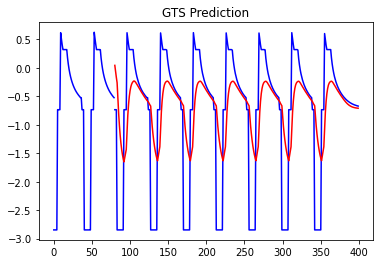

2


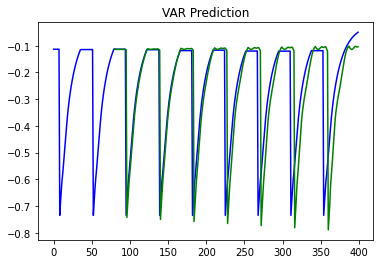

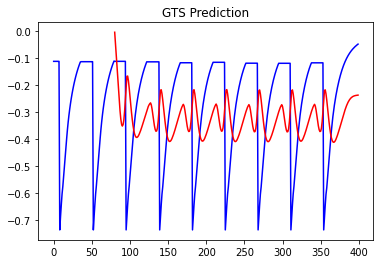

3


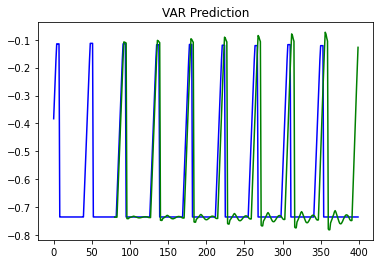

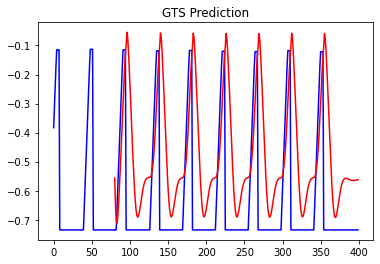

4


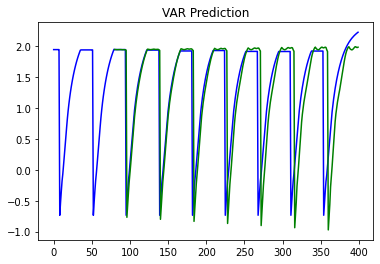

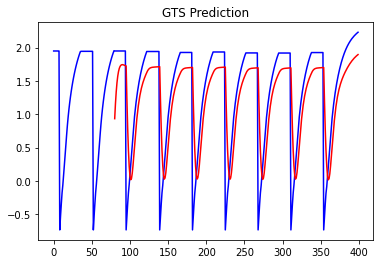

5


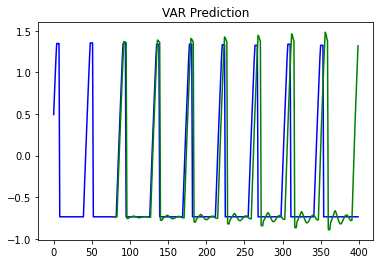

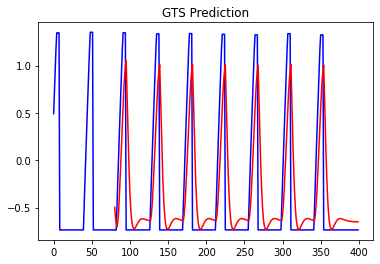

In [14]:
"""
Example Visualisation
"""

# for each measurement
for i in range(6):

  print(i)

  plt.title("VAR Prediction")
  plt.plot(range(input.shape[0]), input[:, i], c="b")
  plt.plot(range(input.shape[0], input.shape[0] + labels.shape[0]), labels[:, i], c="b")
  plt.plot(range(input.shape[0], input.shape[0] + labels.shape[0]), var_prediction[:, i], c="g")
  plt.show()

  plt.title("GTS Prediction")
  plt.plot(range(input.shape[0]), input[:, i], c="b")
  plt.plot(range(input.shape[0], input.shape[0] + labels.shape[0]), labels[:, i], c="b")
  plt.plot(range(input.shape[0], input.shape[0] + labels.shape[0]), gts_prediction[:, i], c="r")
  plt.show()

GTS 0.31622437 0.29545948 0.10673572
VAR 0.3844096 0.4232905 0.13014643


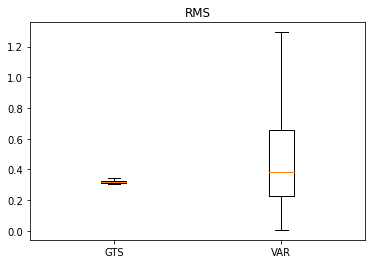

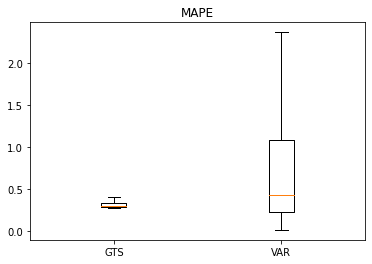

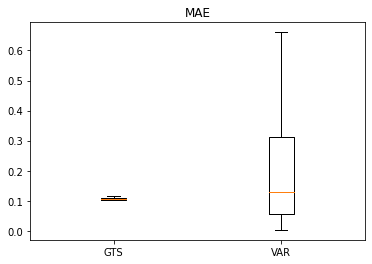

0


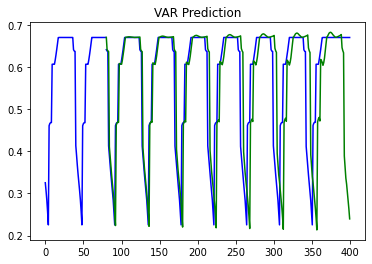

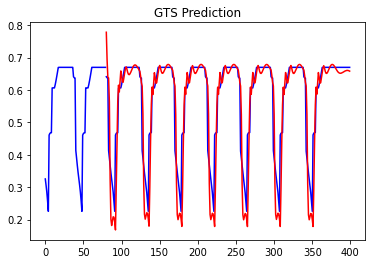

1


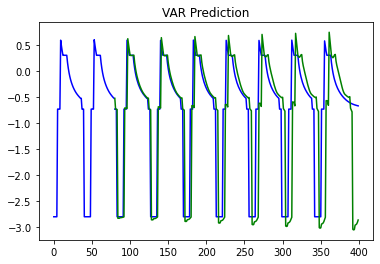

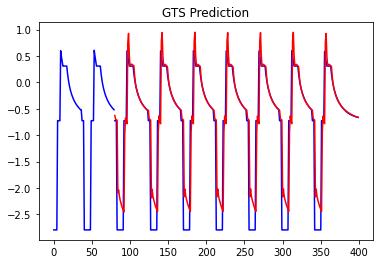

2


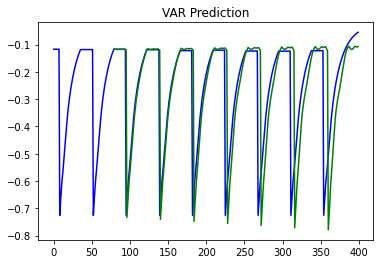

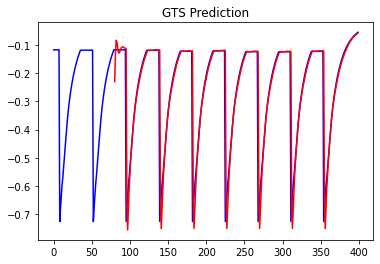

3


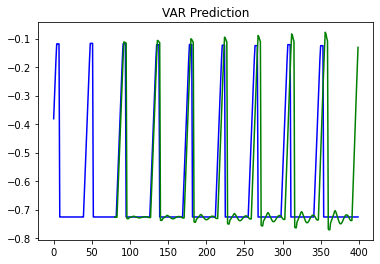

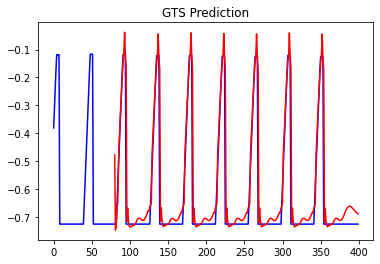

4


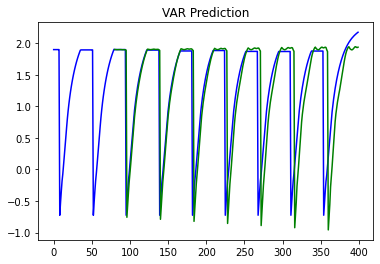

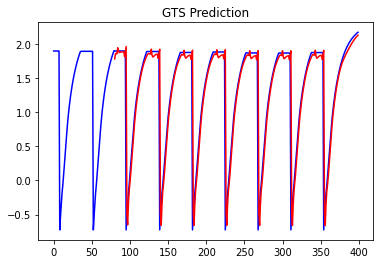

5


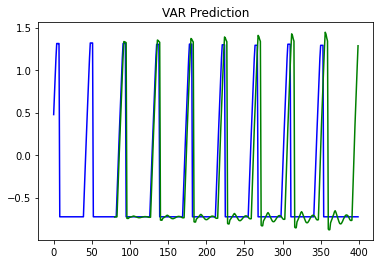

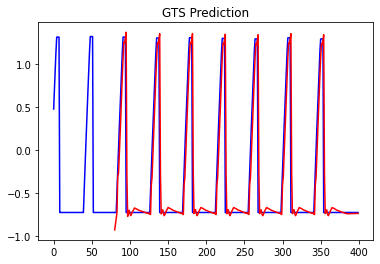

### debug baseline

In [ ]:
def historical_average_predict(df, period=12 * 24 * 7, test_ratio=0.2, null_val=0.):
    """
    Calculates the historical average of sensor reading.
    :param df:
    :param period: default 1 week.
    :param test_ratio:
    :param null_val: default 0.
    :return:
    """
    n_sample, n_sensor = df.shape
    n_test = int(round(n_sample * test_ratio))
    n_train = n_sample - n_test
    y_test = df[-n_test:]
    y_predict = pd.DataFrame.copy(y_test)

    for i in range(n_train, min(n_sample, n_train + period)):
        inds = [j for j in range(i % period, n_train, period)]
        historical = df.iloc[inds, :]
        y_predict.iloc[i - n_train, :] = historical[historical != null_val].mean()
    # Copy each period.
    for i in range(n_train + period, n_sample, period):
        size = min(period, n_sample - i)
        start = i - n_train
        y_predict.iloc[start:start + size, :] = y_predict.iloc[start - period: start + size - period, :].values
    return y_predict, y_test


def static_predict(df, n_forward, test_ratio=0.2):
    """
    Assumes $x^{t+1} = x^{t}$
    :param df:
    :param n_forward:
    :param test_ratio:
    :return:
    """
    test_num = int(round(df.shape[0] * test_ratio))
    y_test = df[-test_num:]
    y_predict = df.shift(n_forward).iloc[-test_num:]
    return y_predict, y_test


def var_predict(df, n_forwards=(1, 3), n_lags=4, test_ratio=0.2):
    """
    Multivariate time series forecasting using Vector Auto-Regressive Model.
    :param df: pandas.DataFrame, index: time, columns: sensor id, content: data.
    :param n_forwards: a tuple of horizons.
    :param n_lags: the order of the VAR model.
    :param test_ratio:
    :return: [list of prediction in different horizon], dt_test
    """
    n_sample, n_output = df.shape
    n_test = int(round(n_sample * test_ratio))
    n_train = n_sample - n_test
    df_train, df_test = df[:n_train], df[n_train:]

    scaler = StandardScaler(mean=df_train.values.mean(), std=df_train.values.std())
    data = scaler.transform(df_train.values)
    var_model = VAR(data)
    var_result = var_model.fit(n_lags)
    max_n_forwards = np.max(n_forwards)
    # Do forecasting.
    result = np.zeros(shape=(len(n_forwards), n_test, n_output))
    start = n_train - n_lags - max_n_forwards + 1
    for input_ind in range(start, n_sample - n_lags):
        prediction = var_result.forecast(scaler.transform(df.values[input_ind: input_ind + n_lags]), max_n_forwards)
        for i, n_forward in enumerate(n_forwards):
            result_ind = input_ind - n_train + n_lags + n_forward - 1
            if 0 <= result_ind < n_test:
                result[i, result_ind, :] = prediction[n_forward - 1, :]

    df_predicts = []
    for i, n_forward in enumerate(n_forwards):
        df_predict = pd.DataFrame(scaler.inverse_transform(result[i]), index=df_test.index, columns=df_test.columns)
        df_predicts.append(df_predict)
    return df_predicts, df_test


def eval_static(traffic_reading_df):
    logger.info('Static')
    # horizons = [1, 3, 6, 12]
    horizons = [320]
    logger.info('\t'.join(['Model', 'Horizon', 'RMSE', 'MAPE', 'MAE']))
    for horizon in horizons:
        y_predict, y_test = static_predict(traffic_reading_df, n_forward=horizon, test_ratio=0.2)
        # y_test.plot(subplots=True)
        # y_predict.plot(subplots=True)
        # plt.show()

        rmse = masked_rmse_np(preds=y_predict.values, labels=y_test.values, null_val=0)
        mape = masked_mape_np(preds=y_predict.values, labels=y_test.values, null_val=0)
        mae = masked_mae_np(preds=y_predict.values, labels=y_test.values, null_val=0)
        line = 'Static\t%d\t%.2f\t%.2f\t%.2f' % (horizon, rmse, mape * 100, mae)
        logger.info(line)

        for col in y_test.columns.values:
          plt.figure(figsize=(10, 5))
          plt.title(col)
          plt.plot(y_test[col], "b")
          plt.plot(y_predict[col], "r")
          plt.show()

def eval_historical_average(traffic_reading_df, period):
    y_predict, y_test = historical_average_predict(traffic_reading_df, period=period, test_ratio=0.2)
    # y_test.plot(subplots=True)
    # y_predict.plot(subplots=True)
    # plt.show()

    rmse = masked_rmse_np(preds=y_predict.values, labels=y_test.values, null_val=0)
    mape = masked_mape_np(preds=y_predict.values, labels=y_test.values, null_val=0)
    mae = masked_mae_np(preds=y_predict.values, labels=y_test.values, null_val=0)
    logger.info('Historical Average')
    logger.info('\t'.join(['Model', 'Horizon', 'RMSE', 'MAPE', 'MAE']))
    # for horizon in [1, 3, 6, 12]:
    for horizon in [320]:
        line = 'HA\t%d\t%.2f\t%.2f\t%.2f' % (horizon, rmse, mape * 100, mae)
        logger.info(line)

    for col in y_test.columns.values:
      plt.figure(figsize=(10, 5))
      plt.title(col)
      plt.plot(y_test[col], "b")
      plt.plot(y_predict[col], "r")
      plt.show()


def eval_var(traffic_reading_df, n_lags=3):
    # n_forwards = [1, 3, 6, 12]
    n_forwards = [320]
    y_predicts, y_test = var_predict(traffic_reading_df, n_forwards=n_forwards, n_lags=n_lags,
                                     test_ratio=0.2)
    # y_test.plot(subplots=True)
    # plt.show()
    logger.info('VAR (lag=%d)' % n_lags)
    logger.info('Model\tHorizon\tRMSE\tMAPE\tMAE')
    for i, horizon in enumerate(n_forwards):
        # y_predicts[i].plot(subplots=True)
        rmse = masked_rmse_np(preds=y_predicts[i].values, labels=y_test.values, null_val=0)
        mape = masked_mape_np(preds=y_predicts[i].values, labels=y_test.values, null_val=0)
        mae = masked_mae_np(preds=y_predicts[i].values, labels=y_test.values, null_val=0)
        line = 'VAR\t%d\t%.2f\t%.2f\t%.2f' % (horizon, rmse, mape * 100, mae)
        logger.info(line)

        for col in y_test.columns.values:
          plt.figure(figsize=(10, 5))
          plt.title(col)
          plt.plot(y_test[col], "b")
          plt.plot(y_predicts[i][col], "r")
          plt.show()


In [ ]:
from lib import utils

In [ ]:
logger = utils.get_logger('data/model', 'Baseline')

traffic_reading_df = pd.read_hdf("data/graphbatt/DOE-001-050-10DU_05_Channel_82_1.h5")
eval_static(traffic_reading_df)
eval_historical_average(traffic_reading_df, period=80)
eval_var(traffic_reading_df, n_lags=80)

2021-09-17 13:18:54,412 - INFO - Log directory: data/model
2021-09-17 13:18:54,412 - INFO - Log directory: data/model
